# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics, decomposition
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

In [31]:
data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [32]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

**SILHOUETTE SCORE**
* Indica la similitud de los objetos de un mismo cluster en comparación con los otros clusters.
* El valor va de -1 a +1, donde un valor alto indica que el objeto está bien emparejado con su propio cluster y mal emparejado con los clusters vecinos. 
* Si la mayoría de los objetos tienen un valor alto, entonces la configuración del cluster es apropiada. 
* Si muchos puntos tienen un valor bajo o negativo, entonces la configuración de cúmulos puede tener demasiados o muy pocos cúmulos. 

In [10]:
model = KMeans(n_clusters=8) #K-Means model--> El algoritmo necesita que le especifiquemos un punto de partida
labels = model.fit_predict(X)
metrics.silhouette_score(X, labels)

0.5369913269089153

**KElbowVisualizer**
* Implements the “elbow” method to help select the optimal number of clusters by fitting the model with a range of values for K.
* Viene inherente al cálculo de silhouette score.
* En este caso, hará 5 iteraciones: una con k=10, otra con k=11,..y por cada iteración calcula un average score.

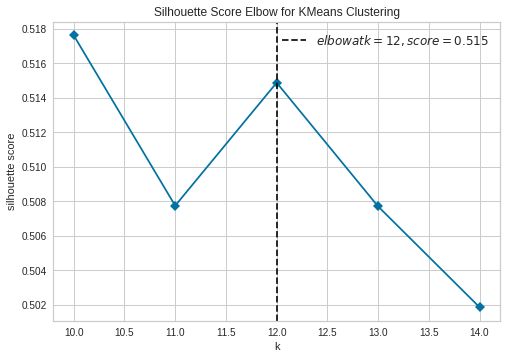

In [12]:
# visualization
visualizer = KElbowVisualizer(model, k=(10,15), metric="silhouette", timings=False)
visualizer.fit(X)
visualizer.show() 

# ¡Ojo! El resultado va cambiando según la iteración
# El codo está en k=12, lo que significa que el mejor modelo se hace con 12 clusters

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [16]:
model = KMeans(n_clusters=5)
labels = model.fit_predict(X)
metrics.silhouette_score(X, labels) # Ha mejorado un poco con 5 clusters.

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [17]:
model = KMeans(n_clusters=3) 
labels = model.fit_predict(X)
metrics.silhouette_score(X, labels) # Ha mejorado algo más

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

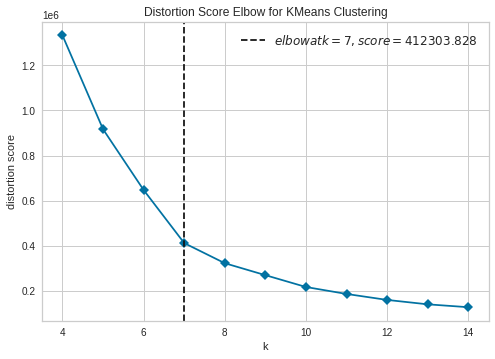

In [19]:
# visualization with n_clusters = 3 (best number of clusters we found)
visualizer = KElbowVisualizer(model, k=(4,15), metric="distortion", timings=False)
visualizer.fit(X)
visualizer.show()

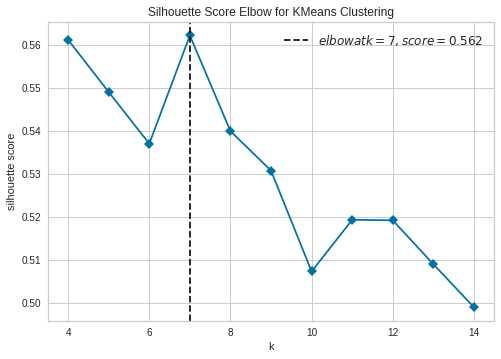

In [20]:
# visualization with n_clusters = 3 (best number of clusters we found)
visualizer = KElbowVisualizer(model, k=(4,15), metric="silhouette", timings=False)
visualizer.fit(X)
visualizer.show()

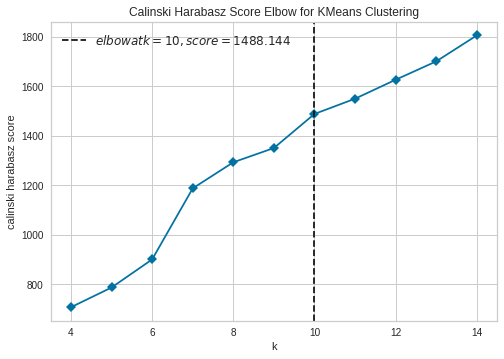

In [21]:
# visualization with n_clusters = 3 (best number of clusters we found) 
visualizer = KElbowVisualizer(model, k=(4,15), metric="calinski_harabasz", timings=False)
visualizer.fit(X)
visualizer.show()

Según las métricas distorsión y silhouette, el número de clusters óptimo es 7. De acuerdo a la métrica calinski_harabasz, el número óptimo es 10.

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

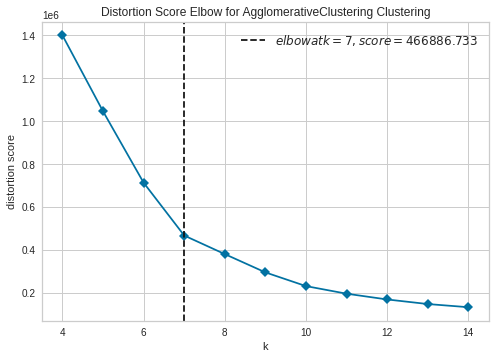

In [22]:
model = AgglomerativeClustering()

# visualization with n_clusters = 3 (best number of clusters we found)
visualizer = KElbowVisualizer(model, k=(4,15), timings=False)
visualizer.fit(X)
visualizer.show()

Same result as K-Means with a metric = distorsion (by default).

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [36]:
model = KMeans(n_clusters=3) # create the model
labels = model.fit_predict(X) # fit the model generating the labels
X["labels"] = labels # include the labels in the data

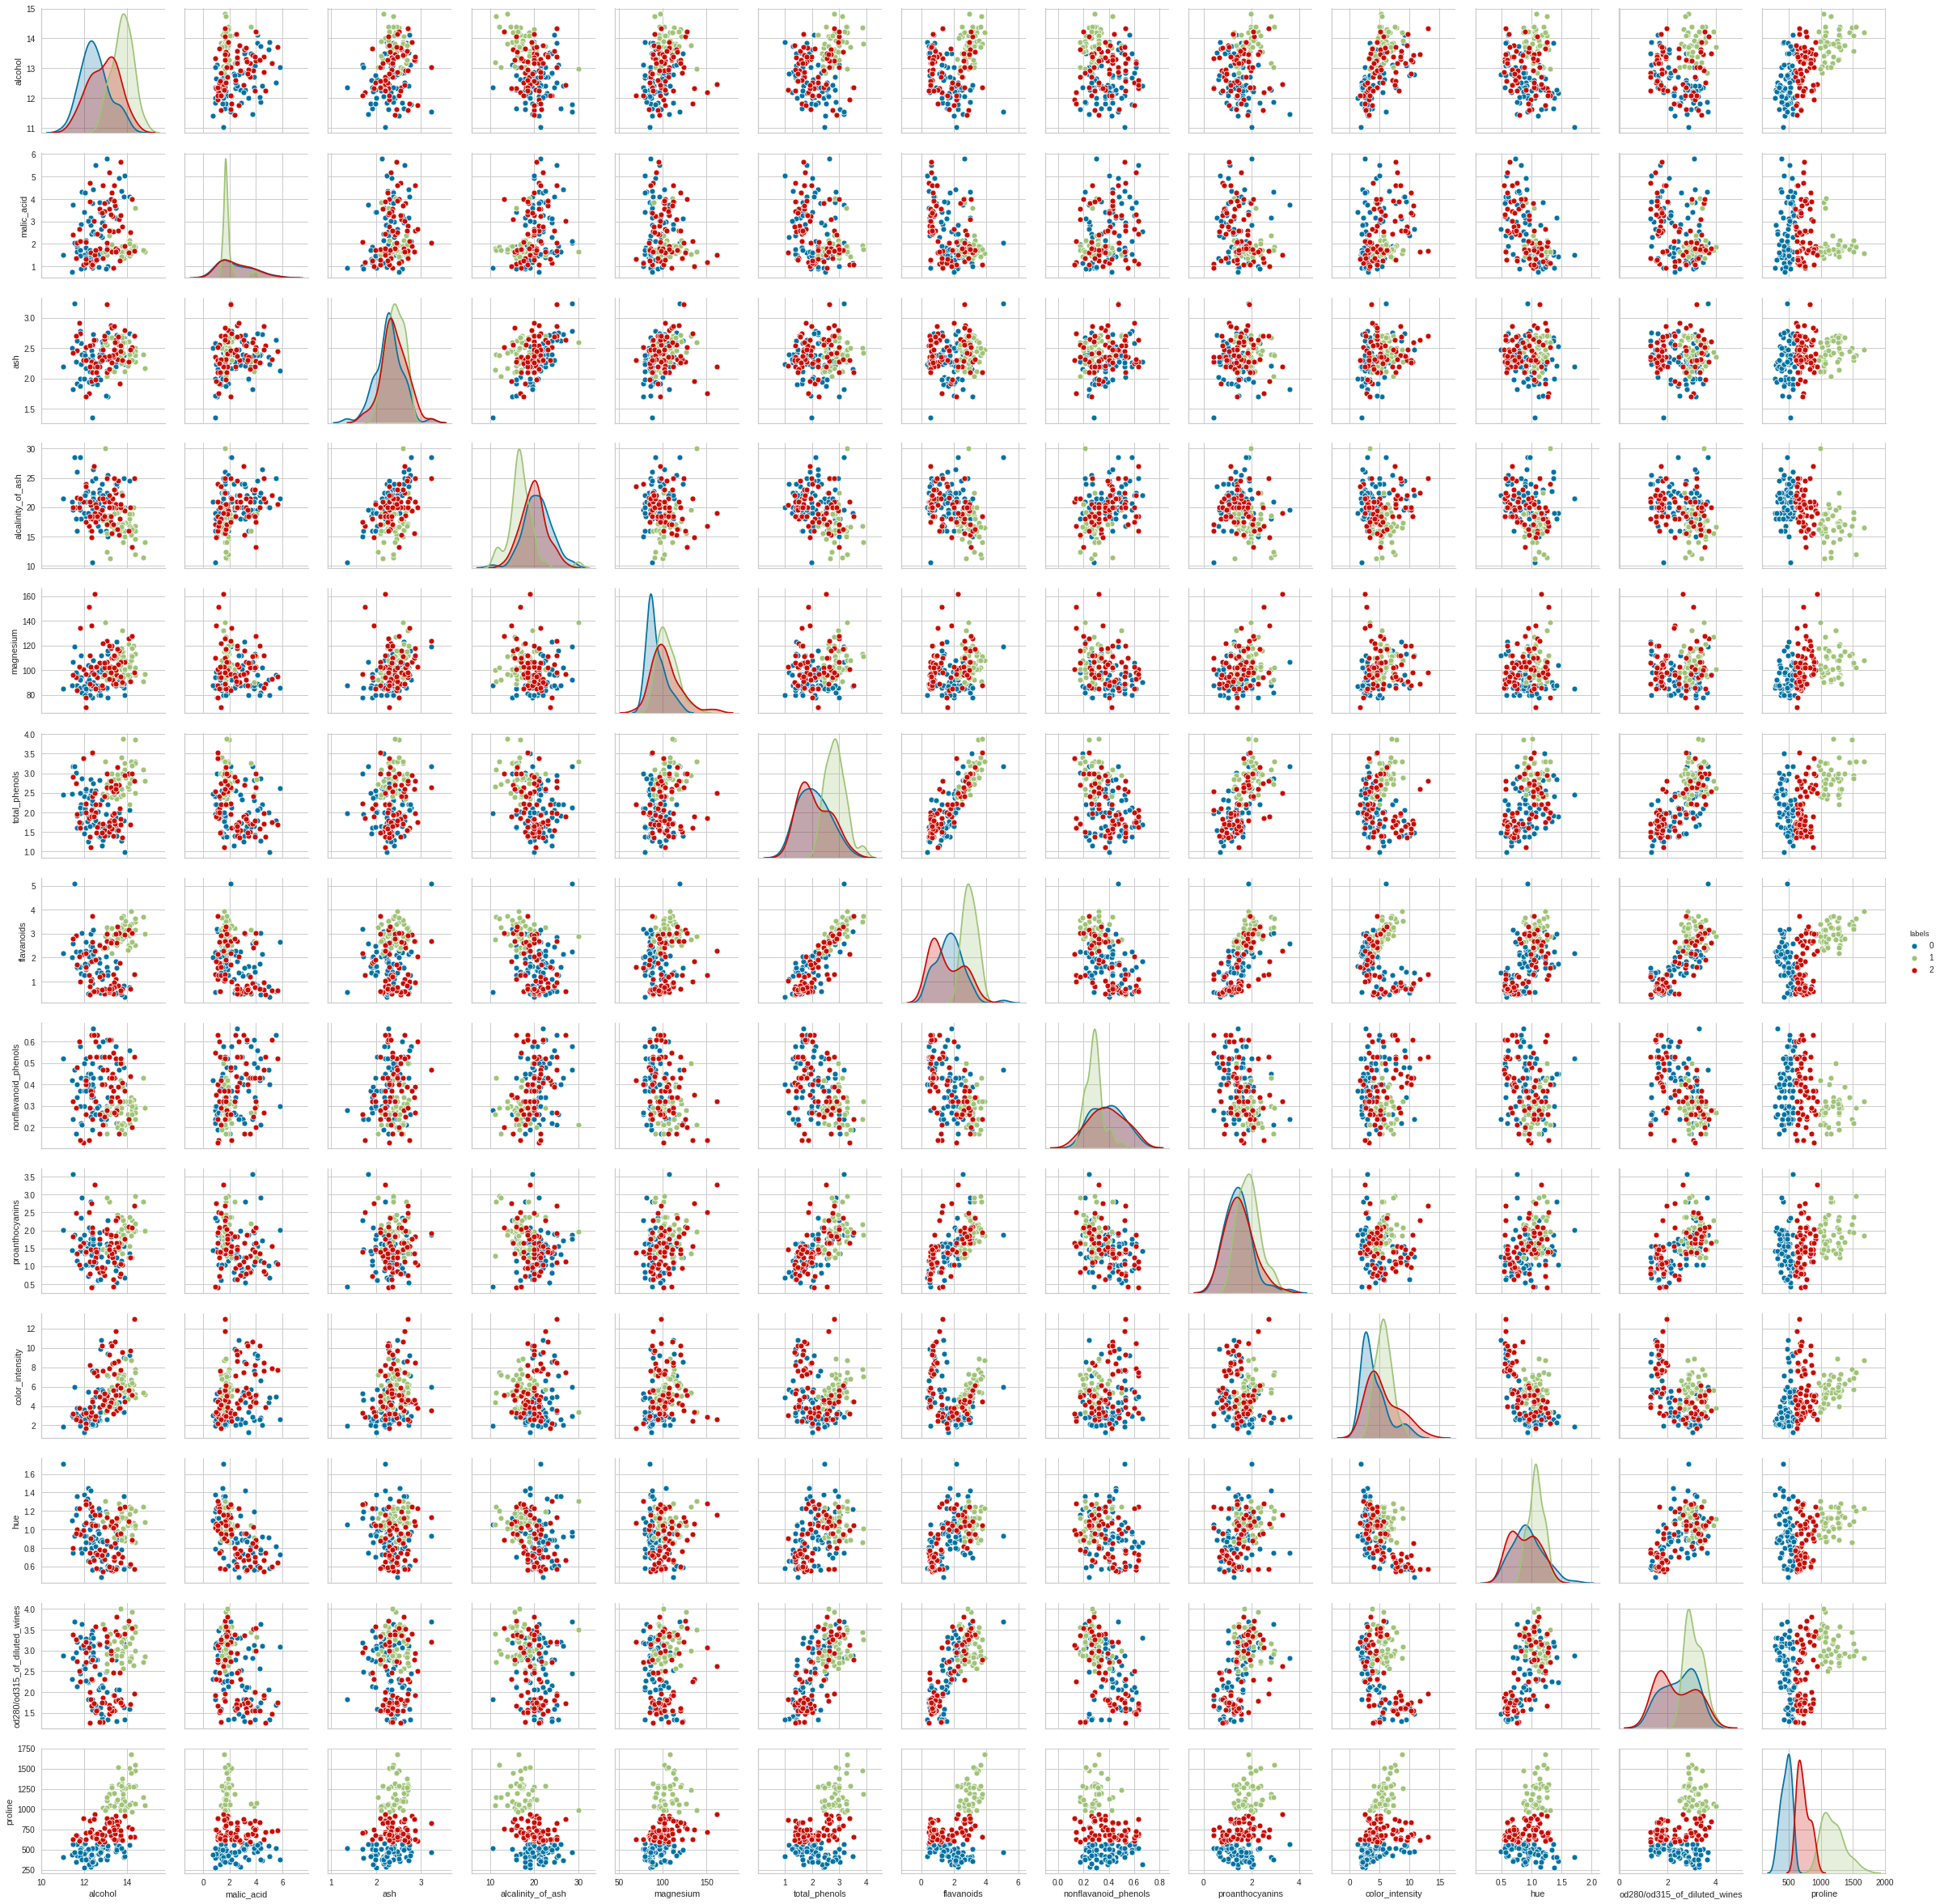

In [44]:
sns.pairplot(X, hue="labels")

Las distribuciones se solapan bastante y los clusters no agrupan con suficiente precisión.

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [78]:
pca = decomposition.PCA(n_components=2) # creating a PCA model with 2 components
transformed = pca.fit_transform(X) # fit and transform the model

data_ = np.column_stack((transformed,labels)) #stacking transformed and labels arrays

df = pd.DataFrame(data = data_, columns = ["pca1", "pca2", "labels"])

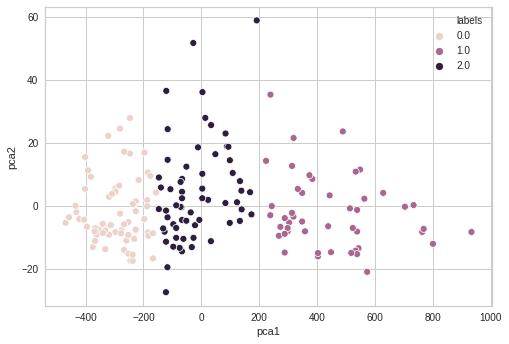

In [86]:
sns.scatterplot(x = df["pca1"], y = df["pca2"], hue = df["labels"], legend = "full")

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.